In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset into your Python environment.

movies=pd.read_csv("/kaggle/input/karan-arun-mohite/top10K-TMDB-movies.csv")

In [3]:
# Display the top 5 rows to get a sense of the data's structure.

movies.head(5)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [4]:

#Check the data types of each column to understand the variables.
movies.dtypes

id                     int64
title                 object
genre                 object
original_language     object
overview              object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
dtype: object

In [5]:
# Determine the dataset's size (number of rows & columns).

movies.shape

(10000, 9)

In [6]:
# Determine the dataset's size (number of rows & columns).

movies.size

90000

In [7]:
#Generate summary statistics for each column.
movies.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [9]:

# Create a correlation matrix to examine relationships between variables.
# Write a few sentences explaining what you see in the correlation matrix.

# Compute correlation matrix

# Select only numerical columns
numeric_movies = movies.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_movies.corr()

# Display the correlation matrix
print(correlation_matrix)


'''Correlation measures the relationship between two numerical variables. It tells us how strongly and in what direction they are related.

Key Points:
Correlation values range from -1 to 1

+1 → Strong Positive Correlation (Both increase together)
0 → No Correlation (No relationship)
-1 → Strong Negative Correlation (One increases, the other decreases)
'''

                    id  popularity  vote_average  vote_count
id            1.000000    0.120659     -0.005508   -0.066145
popularity    0.120659    1.000000      0.063578    0.092843
vote_average -0.005508    0.063578      1.000000    0.267764
vote_count   -0.066145    0.092843      0.267764    1.000000


'Correlation measures the relationship between two numerical variables. It tells us how strongly and in what direction they are related.\n\nKey Points:\nCorrelation values range from -1 to 1\n\n+1 → Strong Positive Correlation (Both increase together)\n0 → No Correlation (No relationship)\n-1 → Strong Negative Correlation (One increases, the other decreases)\n'

In [10]:
movies['vote_count'].values

array([21862,  3731, 16280, ...,   332,   668,   221])

In [11]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [12]:
# Data Preparation

# Data Cleaning: Describe any data cleaning steps performed.
# For example, "We handled missing values using [imputation method] and removed outliers."

required_columns = ['vote_count', 'vote_average']
missing_columns = [col for col in required_columns if col not in movies.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")


All required columns are present.


In [13]:
movies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [14]:

# Specify whether your task is regression or classification.

features = ["vote_average", "vote_count", "original_language"]  # Example features

# Encoding categorical feature (original_language)
label_encoder = LabelEncoder()
movies["original_language"] = label_encoder.fit_transform(movies["original_language"])

X = movies[features]

# Regression Task - Predicting Popularity
y_regression = movies["popularity"]  # Numerical target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

print("Regression Task - Predicting Popularity")
print(y_regression.head())

Regression Task - Predicting Popularity
0    94.075
1    25.408
2    90.585
3    44.761
4    57.749
Name: popularity, dtype: float64


In [15]:
#Clearly define the independent variables (features) and the dependent variable (target).


movies["original_language"] = label_encoder.fit_transform(movies["original_language"])

X = movies[features]  # Feature set

# Define dependent variable (target)
y_regression = movies["popularity"]  # Target variable for regression

# Splitting the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Display first few rows of the target variable
print("Regression Task - Predicting Popularity")
print(y_regression.head())



Regression Task - Predicting Popularity
0    94.075
1    25.408
2    90.585
3    44.761
4    57.749
Name: popularity, dtype: float64


In [16]:
#Split the dataset into training and test sets for model evaluation.

from sklearn.model_selection import train_test_split

# Check available columns
print(movies.columns)

# Define features (X) and target (y)
# Update features list based on the actual columns present
X = movies[['genre', 'overview']]  # Use available columns
y = movies['id']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Result: 80% data for training, 20% for testing


Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')


In [17]:
X_train

,genre,overview
9254,"Horror,Thriller",Deaths tells the story of an all-American guy ...
1561,Drama,"Joe Gideon is at the top of the heap, one of t..."
1670,"War,Drama","During World War II, a small group of survivor..."
6087,"Adventure,Family,Fantasy",A nine-year-old boy gets a plastic Indian and ...
6669,"Adventure,Comedy,Family,Science Fiction",The scientist father of a teenage girl and boy...
...,...,...
5734,"Comedy,Horror",Three scouts and lifelong friends join forces ...
5191,"Animation,Comedy,Fantasy",The Simpsons host a Disney+ Day party and ever...
5390,"Comedy,Drama",A couple is going through marital troubles mad...
860,"Fantasy,Drama",A collection of magical tales based upon the a...


In [18]:
X_test

,genre,overview
6252,"Horror,Drama,Thriller","When Nancy is surfing on a secluded beach, she..."
4684,Drama,J.R. is a fatherless boy growing up in the glo...
1731,"Family,Animation,Comedy,Adventure",Asterix and Obelix depart on an adventure to c...
4742,"Drama,Thriller",A truffle hunter who lives alone in the Oregon...
4521,Comedy,"Elle Woods, a fashionable sorority queen, is d..."
...,...,...
6412,"Comedy,Fantasy,Romance",When her scientist ex-boyfriend discovers a po...
8285,Comedy,A joyous family reunion becomes a hilarious ni...
7853,"Action,Fantasy,Horror,Mystery","On 28 December 1999, the citizens of New York ..."
1095,Drama,"Sam, a neurodivergent man, has a daughter with..."


In [19]:
y_train

9254     12171
1561     16858
1670     13321
6087     11359
6669      9354
         ...  
5734    273477
5191    877183
5390    399725
860      12516
7270    613080
Name: id, Length: 8000, dtype: int64

In [20]:
y_train

9254     12171
1561     16858
1670     13321
6087     11359
6669      9354
         ...  
5734    273477
5191    877183
5390    399725
860      12516
7270    613080
Name: id, Length: 8000, dtype: int64

In [21]:
# Check existing columns
print("Columns in dataset:", movies.columns)

# Fill missing values for available columns
movies = movies.copy()  # Avoid chained assignment warnings
movies["popularity"] = movies["popularity"].fillna(movies["popularity"].median())
movies["vote_average"] = movies["vote_average"].fillna(movies["vote_average"].median())

# If 'vote_count' column is not present, you can skip the following step
if 'vote_count' in movies.columns:
    movies["vote_count"] = movies["vote_count"].fillna(movies["vote_count"].median())

# Select features available in the dataset
features = ["popularity", "vote_average"]  # Only available features
X = movies[features]

# If 'popularity' is your target variable (for regression task)
y_regression = movies["popularity"]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Display first few rows
print("Processed Data for Model:")
print(X.head())

Columns in dataset: Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')
Processed Data for Model:
   popularity  vote_average
0      94.075           8.7
1      25.408           8.7
2      90.585           8.7
3      44.761           8.6
4      57.749           8.6


In [22]:
# Creating a new feature 'log_popularity' by applying logarithmic transformation
movies["log_popularity"] = np.log(movies["popularity"])

# Displaying the first few rows to check the new feature
print(movies.head())

      id                        title                 genre  \
0    278     The Shawshank Redemption           Drama,Crime   
1  19404  Dilwale Dulhania Le Jayenge  Comedy,Drama,Romance   
2    238                The Godfather           Drama,Crime   
3    424             Schindler's List     Drama,History,War   
4    240       The Godfather: Part II           Drama,Crime   

   original_language                                           overview  \
0                 10  Framed in the 1940s for the double murder of h...   
1                 18  Raj is a rich, carefree, happy-go-lucky second...   
2                 10  Spanning the years 1945 to 1955, a chronicle o...   
3                 10  The true story of how businessman Oskar Schind...   
4                 10  In the continuing saga of the Corleone crime f...   

   popularity release_date  vote_average  vote_count  log_popularity  
0      94.075   1994-09-23           8.7       21862        4.544092  
1      25.408   1995-10-19  

In [23]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale = ['popularity', 'vote_average']

# Fit the scaler on the data and transform the selected columns
movies[columns_to_scale] = scaler.fit_transform(movies[columns_to_scale])

# Display the scaled dataset
print("Scaled Data:")
print(movies.head())

Scaled Data:
      id                        title                 genre  \
0    278     The Shawshank Redemption           Drama,Crime   
1  19404  Dilwale Dulhania Le Jayenge  Comedy,Drama,Romance   
2    238                The Godfather           Drama,Crime   
3    424             Schindler's List     Drama,History,War   
4    240       The Godfather: Part II           Drama,Crime   

   original_language                                           overview  \
0                 10  Framed in the 1940s for the double murder of h...   
1                 18  Raj is a rich, carefree, happy-go-lucky second...   
2                 10  Spanning the years 1945 to 1955, a chronicle o...   
3                 10  The true story of how businessman Oskar Schind...   
4                 10  In the continuing saga of the Corleone crime f...   

   popularity release_date  vote_average  vote_count  log_popularity  
0    0.008957   1994-09-23       1.00000       21862        4.544092  
1    0.002377  

In [24]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply standardization
movies[columns_to_scale] = scaler.fit_transform(movies[columns_to_scale])

# Display the standardized dataset
print("Standardized Data:")
print(movies.head())

Standardized Data:
      id                        title                 genre  \
0    278     The Shawshank Redemption           Drama,Crime   
1  19404  Dilwale Dulhania Le Jayenge  Comedy,Drama,Romance   
2    238                The Godfather           Drama,Crime   
3    424             Schindler's List     Drama,History,War   
4    240       The Godfather: Part II           Drama,Crime   

   original_language                                           overview  \
0                 10  Framed in the 1940s for the double murder of h...   
1                 18  Raj is a rich, carefree, happy-go-lucky second...   
2                 10  Spanning the years 1945 to 1955, a chronicle o...   
3                 10  The true story of how businessman Oskar Schind...   
4                 10  In the continuing saga of the Corleone crime f...   

   popularity release_date  vote_average  vote_count  log_popularity  
0    0.280516   1994-09-23      2.713220       21862        4.544092  
1   -0.04

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


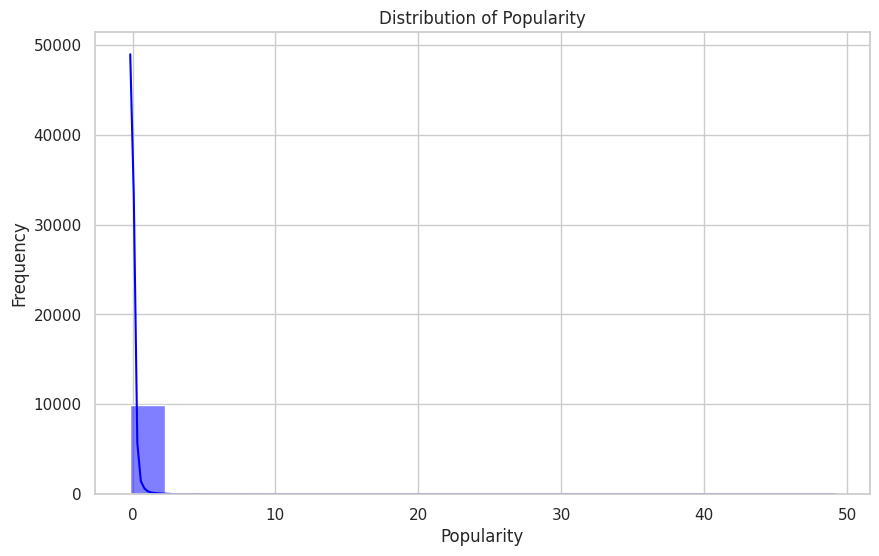

In [25]:
# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Histogram for Popularity
plt.figure(figsize=(10, 6))
sns.histplot(movies['popularity'], kde=True, color='blue', bins=20)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


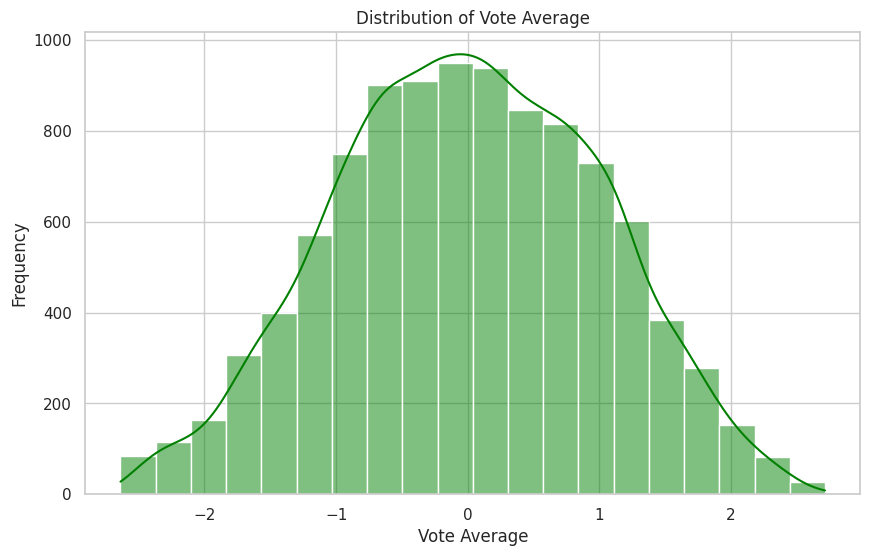

In [26]:
# 2. Histogram for Vote Average
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], kde=True, color='green', bins=20)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

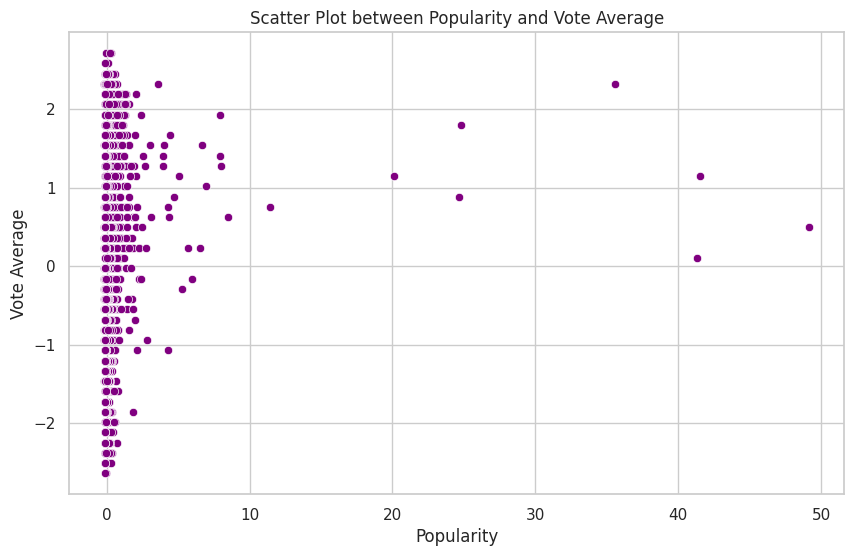

In [27]:
# 3. Scatter Plot between Popularity and Vote Average
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='popularity', y='vote_average', color='purple')
plt.title('Scatter Plot between Popularity and Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

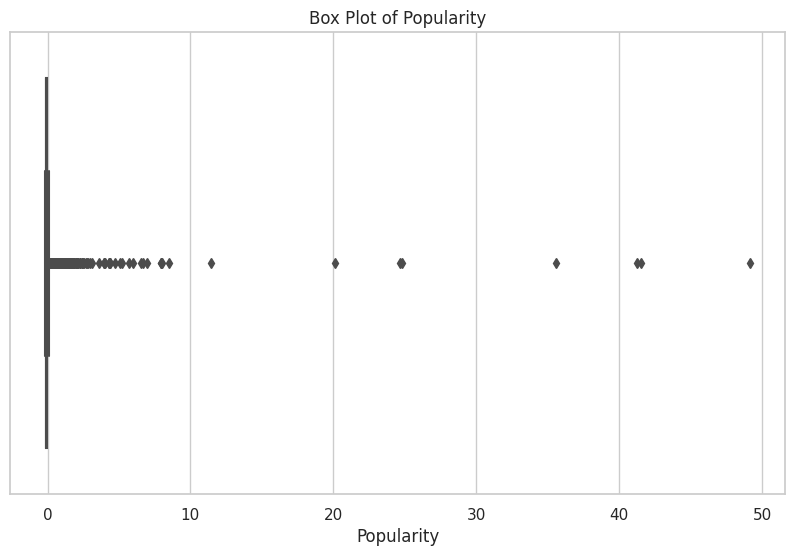

In [28]:
# 4. Box Plot for Popularity (to check for outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['popularity'], color='red')
plt.title('Box Plot of Popularity')
plt.xlabel('Popularity')
plt.show()

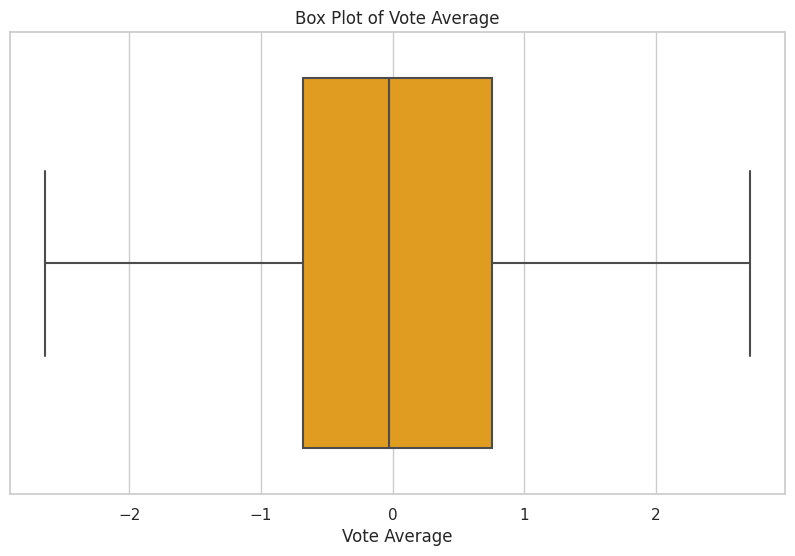

In [29]:
# 5. Box Plot for Vote Average (to check for outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['vote_average'], color='orange')
plt.title('Box Plot of Vote Average')
plt.xlabel('Vote Average')
plt.show()

In [30]:
# Detect Outliers using IQR Method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [31]:
# 1. Outlier detection for Popularity
outliers_popularity, lower_pop, upper_pop = detect_outliers_iqr(movies, 'popularity')
print(f"Outliers in Popularity: \n{outliers_popularity}")
print(f"Lower Bound: {lower_pop}, Upper Bound: {upper_pop}")

Outliers in Popularity: 
          id                                  title                     genre  \
0        278               The Shawshank Redemption               Drama,Crime   
2        238                          The Godfather               Drama,Crime   
4        240                 The Godfather: Part II               Drama,Crime   
6        129                          Spirited Away  Animation,Family,Fantasy   
7     730154                         Your Eyes Tell             Romance,Drama   
...      ...                                    ...                       ...   
9930    4258                          Scary Movie 5                    Comedy   
9952   74997  The Human Centipede 2 (Full Sequence)        Drama,Horror,Crime   
9963  765119                             The Bubble                    Comedy   
9992  853588                                   Prey                  Thriller   
9995   10196                     The Last Airbender  Action,Adventure,Fantasy   

  

In [32]:
# 2. Outlier detection for Vote Average
outliers_vote_avg, lower_vote, upper_vote = detect_outliers_iqr(movies, 'vote_average')
print(f"Outliers in Vote Average: \n{outliers_vote_avg}")
print(f"Lower Bound: {lower_vote}, Upper Bound: {upper_vote}")

Outliers in Vote Average: 
Empty DataFrame
Columns: [id, title, genre, original_language, overview, popularity, release_date, vote_average, vote_count, log_popularity]
Index: []
Lower Bound: -2.8336855937172403, Upper Bound: 2.908992992449471


In [33]:
# 3. Handle Outliers: Remove outliers by filtering out values outside the IQR range
movies_cleaned = movies[
    (movies['popularity'] >= lower_pop) & (movies['popularity'] <= upper_pop) &
    (movies['vote_average'] >= lower_vote) & (movies['vote_average'] <= upper_vote)
]

In [34]:
# Display cleaned data after removing outliers
print("Data after removing outliers:")
print(movies_cleaned.head())

Data after removing outliers:
        id                        title                 genre  \
1    19404  Dilwale Dulhania Le Jayenge  Comedy,Drama,Romance   
3      424             Schindler's List     Drama,History,War   
5   667257            Impossible Things          Family,Drama   
8   372754     Dou kyu sei – Classmates     Romance,Animation   
10     389                 12 Angry Men                 Drama   

    original_language                                           overview  \
1                  18  Raj is a rich, carefree, happy-go-lucky second...   
3                  10  The true story of how businessman Oskar Schind...   
5                  11  Matilde is a woman who, after the death of her...   
8                  23  Rihito Sajo, an honor student with a perfect s...   
10                 10  The defense and the prosecution have rested an...   

    popularity release_date  vote_average  vote_count  log_popularity  
1    -0.043885   1995-10-19      2.713220        3

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
 

# Selecting necessary columns
movies = movies[['id', 'title', 'overview']].dropna()

# **1. Feature Engineering: Convert Text to TF-IDF Vectors**
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['overview'])  

# **2. Compute Similarity using Cosine Similarity**
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# **3. Create Movie Index Mapping**
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

# **4. Recommendation Function**
def get_recommendations(title, cosine_sim=cosine_sim, top_n=5):
    if title not in indices:
        return "Movie not found. Please check the title."

    idx = indices[title]  
    sim_scores = list(enumerate(cosine_sim[idx]))  
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  
    sim_scores = sim_scores[1:top_n+1]  

    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]  

# **5. Model Testing**
movie_name = "Inception"  
recommendations = get_recommendations(movie_name, top_n=5)
print(f"Recommended movies for '{movie_name}':\n", recommendations)

Recommended movies for 'Inception':
 1729                           New World
2730          Suicide Squad: Hell to Pay
361     What Ever Happened to Baby Jane?
7362                               House
2135            Inception: The Cobol Job
Name: title, dtype: object


In [36]:
movies = pd.read_csv('/kaggle/input/karan-arun-mohite/top10K-TMDB-movies.csv')

In [37]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [38]:
movies=movies[['id', 'title', 'overview', 'genre']]
movies

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [39]:
movies['tags'] = movies['overview']+movies['genre']
movies

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [40]:
new_data  = movies.drop(columns=['overview', 'genre'])
new_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
cv=CountVectorizer(max_features=10000, stop_words='english')
cv

CountVectorizer(max_features=10000, stop_words='english')

In [43]:
vector=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()
vector.shape

(10000, 10000)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
similarity=cosine_similarity(vector)

In [46]:
similarity

array([[1.        , 0.05634362, 0.12888482, ..., 0.07559289, 0.11065667,
        0.06388766],
       [0.05634362, 1.        , 0.07624929, ..., 0.        , 0.03636965,
        0.        ],
       [0.12888482, 0.07624929, 1.        , ..., 0.02273314, 0.06655583,
        0.08645856],
       ...,
       [0.07559289, 0.        , 0.02273314, ..., 1.        , 0.03253   ,
        0.02817181],
       [0.11065667, 0.03636965, 0.06655583, ..., 0.03253   , 1.        ,
        0.0412393 ],
       [0.06388766, 0.        , 0.08645856, ..., 0.02817181, 0.0412393 ,
        1.        ]])

In [47]:
new_data[new_data['title']=="The Godfather"].index[0]

2

In [48]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(new_data.iloc[i[0]].title)

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City


In [49]:
def recommand(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(new_data.iloc[i[0]].title)

In [50]:
recommand("Iron Man")

Iron Man
Iron Man 3
Guardians of the Galaxy Vol. 2
Avengers: Age of Ultron
Star Wars: Episode III - Revenge of the Sith


In [51]:
recommand("Love")

Love
Hotel Chevalier
Adam
Last Tango in Paris
Mr. Morgan's Last Love


In [52]:
import pickle

In [53]:
pickle.dump(new_data, open('movies_list.pkl', 'wb'))

In [54]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [55]:
pickle.load(open('movies_list.pkl', 'rb'))

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [56]:
recommand("Domino")

Domino
One for the Money
Man on the Moon
Batman: Hush
Twelve


In [57]:
recommand("Avatar")

Avatar
Krull
Small Soldiers
Predator
Iron Man 3


In [58]:
recommand("The Godfather")

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City
